# TALLER 02 - EJERCICIO 01

- Joshua Daniel Menendez Farias
- Miguel Angel Robles Velez


## Encuentre todas las raíces del polinomio $x^4+540∗x^3+109124∗x^2+9781632∗x+328188672=0$ 



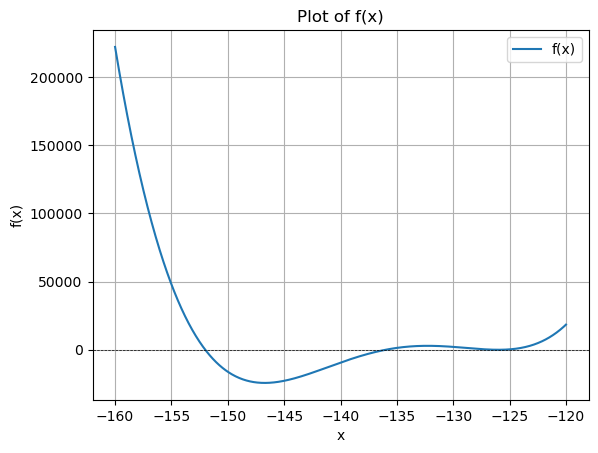

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import imageio
import os


def f(x:float) -> float:
    return (x**4 + 540*x**3 + 109124*x**2 + 9781632*x +328188672)


xs = np.linspace(-160, -120 , 1000)

ys = []
for x in xs:
    ys.append(f(x))


plt.plot(xs, ys, label="f(x)")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Plot of f(x)")
plt.grid(True)
plt.legend()
plt.axhline(0, color='black', lw=0.5, ls='--')


def biseccion_con_grafico_y_gif(a: float, b: float, tol: float = 1e-6, max_iter: int = 50):
    if f(a) * f(b) >= 0:
        print("El método de bisección no es aplicable: f(a) y f(b) deben tener signos opuestos.")
        return None

    iteracion = 0
    filenames = []

    # Determine global x and y limits beforehand
    x_vals_full = np.linspace(a - 10, b + 10, 1000)
    y_vals_full = f(x_vals_full)
    x_min = a - 10
    x_max = b + 10
    y_min = min(y_vals_full)
    y_max = max(y_vals_full)
    y_margin = (y_max - y_min) * 0.1 if y_max != y_min else 1
    y_min -= y_margin
    y_max += y_margin

    while (b - a) / 2 > tol and iteracion < max_iter:
        c = (a + b) / 2
        fa, fb, fc = f(a), f(b), f(c)

        print(f"Iteración {iteracion + 1}: a = {a:.6f}, b = {b:.6f}, c = {c:.6f}, f(c) = {fc:.6f}")

        x_vals = np.linspace(x_min, x_max, 1000)
        y_vals = f(x_vals)

        plt.figure(figsize=(10, 5))
        plt.plot(x_vals, y_vals, label='f(x)', color='black')
        plt.axhline(0, color='gray', linestyle='--')
        plt.plot(a, fa, 'ro', label=f'a = {a:.5f}')
        plt.plot(b, fb, 'go', label=f'b = {b:.5f}')
        plt.plot(c, fc, 'bo', label=f'c = {c:.5f}')
        plt.axvline(x=a, color='red', linestyle='--')
        if b != c:
            plt.axvline(x=b, color='green', linestyle='--')
        if c != a:
            plt.axvline(x=c, color='blue', linestyle='--')

        plt.xlim(x_min, x_max)
        plt.ylim(y_min, y_max)
        plt.title(f'Iteración {iteracion + 1}')
        plt.xlabel('x')
        plt.ylabel('f(x)')
        plt.legend()
        plt.grid(True)

        # Save plot
        filename = f'C:/DANIMF/WORKCENTER/CUARTO_SEMESTRE/REPOSITORI_GRUPAL_MN/TALLER_02/graficas/biseccion_iter_{iteracion+1:02d}.png'
        plt.savefig(filename)
        filenames.append(filename)
        plt.close()

        if abs(fc) < tol:
            break
        elif fa * fc < 0:
            b = c
        else:
            a = c

        iteracion += 1

    # Create animated gif
    gif_path = 'C:/DANIMF/WORKCENTER/CUARTO_SEMESTRE/REPOSITORI_GRUPAL_MN/TALLER_02/graficas/biseccion_animacion.gif'
    with imageio.get_writer(gif_path, mode='I', duration=1.3) as writer:
        for filename in filenames:
            image = imageio.imread(filename)
            writer.append_data(image)

    return gif_path



In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import imageio
import os
from pathlib import Path
from matplotlib.lines import Line2D


def f(x: float) -> float:
    return x**4 + 540*x**3 + 109124*x**2 + 9781632*x + 328188672


def biseccion_con_grafico_combinado(intervalos: list, tol: float = 1e-6, max_iter: int = 20, gif_duration: float = 1.5):
    """
    Aplica el método de bisección a múltiples intervalos y muestra todo en una sola gráfica
    
    Args:
        intervalos: Lista de tuplas con los intervalos iniciales [(a1, b1), (a2, b2), ...]
        tol: Tolerancia para la convergencia
        max_iter: Número máximo de iteraciones
        gif_duration: Duración de cada frame en el GIF (segundos)
    """
    # Configurar directorio de salida
    output_dir = Path('graficas_biseccion_combinada')
    output_dir.mkdir(exist_ok=True)
    
    # Limpiar archivos anteriores
    for file in output_dir.glob('*.png'):
        file.unlink()
    
    # Colores para cada intervalo
    colores = ['red', 'green', 'blue', 'purple', 'orange']
    resultados = []
    filenames = []
    
    # Preparar datos para todas las bisecciones
    procesos = []
    for i, (a, b) in enumerate(intervalos):
        if f(a) * f(b) >= 0:
            print(f"Intervalo {i+1} [{a}, {b}] no tiene cambio de signo. Saltando...")
            continue
        
        procesos.append({
            'a': a,
            'b': b,
            'color': colores[i % len(colores)],
            'iteraciones': 0,
            'terminado': False,
            'raiz': None
        })
    
    if not procesos:
        print("Ningún intervalo válido para bisección")
        return None
    
    # Determinar límites globales del gráfico
    all_points = [a for p in procesos for a in [p['a'], p['b']]] + [b for p in procesos for b in [p['a'], p['b']]]
    x_min = min(all_points) - 5
    x_max = max(all_points) + 5
    x_vals = np.linspace(x_min, x_max, 1000)
    y_vals = f(x_vals)
    y_min = min(y_vals)
    y_max = max(y_vals)
    y_margin = (y_max - y_min) * 0.2
    y_lim = (y_min - y_margin, y_max + y_margin)
    
    # Bucle principal de iteraciones
    for iteracion in range(max_iter):
        plt.figure(figsize=(14, 8))
        
        # Dibujar la función
        plt.plot(x_vals, y_vals, 'k-', linewidth=2, label='f(x)')
        plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
        
        # Procesar cada bisección
        for p in procesos:
            if p['terminado']:
                continue
            
            c = (p['a'] + p['b']) / 2
            fc = f(c)
            
            # Dibujar puntos y líneas
            plt.plot(p['a'], f(p['a']), 'o', color=p['color'], markersize=8)
            plt.plot(p['b'], f(p['b']), 'o', color=p['color'], markersize=8)
            plt.plot(c, fc, 'o', color=p['color'], markersize=8)
            
            plt.axvline(p['a'], color=p['color'], linestyle=':', alpha=0.5)
            plt.axvline(p['b'], color=p['color'], linestyle=':', alpha=0.5)
            plt.axvline(c, color=p['color'], linestyle=':', alpha=0.5)
            
            # Actualizar intervalo
            if f(p['a']) * fc < 0:
                p['b'] = c
            else:
                p['a'] = c
            
            p['iteraciones'] += 1
            
            # Verificar convergencia
            if (p['b'] - p['a'])/2 < tol:
                p['terminado'] = True
                p['raiz'] = c
                plt.plot(c, fc, 'X', color=p['color'], markersize=12, markeredgewidth=2, label=f'Raíz {len(resultados)+1}')
                resultados.append(c)
        
        # Configurar el gráfico
        plt.title('Método de Bisección - Múltiples Intervalos', fontsize=16)
        plt.xlabel('x', fontsize=14)
        plt.ylabel('f(x)', fontsize=14)
        plt.grid(True, alpha=0.3)
        plt.xlim(x_min, x_max)
        plt.ylim(y_lim)
        
        # Crear leyenda personalizada
        legend_elements = []
        for i, p in enumerate(procesos):
            if p['terminado']:
                legend_elements.append(Line2D([0], [0], marker='X', color=p['color'], label=f'Raíz {i+1} ({p["raiz"]:.4f})',
                                          markersize=10, linestyle='None'))
            else:
                legend_elements.append(Line2D([0], [0], marker='o', color=p['color'], label=f'Intervalo {i+1}',
                                          markersize=8, linestyle='None'))
        
        plt.legend(handles=legend_elements, loc='upper right', fontsize=10)
        
        # Guardar imagen
        filename = output_dir / f'biseccion_combinada_iter_{iteracion+1:02d}.png'
        plt.savefig(filename, dpi=100, bbox_inches='tight')
        filenames.append(str(filename))
        plt.close()
        
        # Verificar si todos han terminado
        if all(p['terminado'] for p in procesos):
            break
    
    # Resultados finales
    print("\nResultados finales:")
    for i, raiz in enumerate(resultados, 1):
        print(f"Raíz {i}: {raiz:.8f} (f(x) = {f(raiz):.2e})")
    
    # Crear GIF animado
    if filenames:
        print("\nCreando GIF animado...")
        try:
            with imageio.get_writer(output_dir / 'biseccion_combinada_animacion.gif', 
                                  mode='I', 
                                  duration=gif_duration, 
                                  loop=0) as writer:
                # Añadir todas las imágenes
                for filename in filenames:
                    image = imageio.imread(filename)
                    writer.append_data(image)
                
                # Repetir el último frame
                if filenames:
                    last_image = imageio.imread(filenames[-1])
                    for _ in range(5):  # Más repeticiones del último frame
                        writer.append_data(last_image)
            
            print(f"GIF creado exitosamente en: {output_dir / 'biseccion_combinada_animacion.gif'}")
        except Exception as e:
            print(f"Error al crear el GIF: {str(e)}")
    else:
        print("\nNo se generaron imágenes para crear el GIF.")
    
    return resultados


# Ejemplo de uso con tus intervalos manuales
if __name__ == "__main__":
    # Definir los intervalos manualmente
    mis_intervalos = [(-155, -140), (-140, -130)]
    
    # Ejecutar el método combinado
    raices = biseccion_con_grafico_combinado(mis_intervalos, 
                                           tol=1e-8, 
                                           max_iter=30, 
                                           gif_duration=3.5)
    
    # Mostrar resumen
    if raices:
        print("\nResumen de raíces encontradas:")
        for i, raiz in enumerate(sorted(raices), 1):
            print(f"Raíz {i}: {raiz:.8f}")

Intervalo 3 [-130, -120] no tiene cambio de signo. Saltando...

Resultados finales:
Raíz 1: -136.00000000 (f(x) = 5.96e-06)
Raíz 2: -152.00000000 (f(x) = -3.03e-05)

Creando GIF animado...


C:\Users\danim\AppData\Local\Temp\ipykernel_2576\820438432.py:152: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)
C:\Users\danim\AppData\Local\Temp\ipykernel_2576\820438432.py:157: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  last_image = imageio.imread(filenames[-1])


GIF creado exitosamente en: graficas_biseccion_combinada\biseccion_combinada_animacion.gif

Resumen de raíces encontradas:
Raíz 1: -152.00000000
Raíz 2: -136.00000000


In [18]:
import matplotlib.pyplot as plt
import numpy as np
import imageio
import os
from pathlib import Path


def f(x: float) -> float:
    return x**4 + 540*x**3 + 109124*x**2 + 9781632*x + 328188672


def secante_con_grafico_y_gif(x0: float, x1: float, tol: float = 1e-6, max_iter: int = 20, gif_duration: float = 1.5):
    """
    Método de la secante con visualización gráfica y generación de GIF
    
    Args:
        x0: Primer punto inicial
        x1: Segundo punto inicial
        tol: Tolerancia para la convergencia
        max_iter: Número máximo de iteraciones
        gif_duration: Duración de cada frame en el GIF (segundos)
    """
    # Configurar directorio de salida
    output_dir = Path('graficas_secante')
    output_dir.mkdir(exist_ok=True)
    
    # Limpiar archivos anteriores
    for file in output_dir.glob('*.png'):
        file.unlink()
    
    iteracion = 0
    filenames = []
    x_vals = []
    aproximaciones = []
    
    print(f"\nIniciando método de la secante con x0 = {x0:.6f}, x1 = {x1:.6f}")
    
    # Rango de visualización
    x_min = min(x0, x1) - 5
    x_max = max(x0, x1) + 5
    
    while iteracion < max_iter:
        fx0 = f(x0)
        fx1 = f(x1)
        
        # Calcular nueva aproximación
        if abs(fx1 - fx0) < tol:
            print("Advertencia: Denominador muy pequeño. Posible división por cero.")
            break
            
        x2 = x1 - fx1 * (x1 - x0) / (fx1 - fx0)
        fx2 = f(x2)
        
        x_vals.append(x2)
        aproximaciones.append((x0, x1, x2))
        
        # Crear gráfico
        plt.figure(figsize=(12, 7))
        
        # Graficar la función
        x_range = np.linspace(x_min, x_max, 500)
        y_range = f(x_range)
        plt.plot(x_range, y_range, 'b-', linewidth=2, label='f(x)')
        plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
        
        # Puntos y líneas importantes
        plt.plot(x0, fx0, 'ro', markersize=8, label=f'x₀ ({x0:.5f})')
        plt.plot(x1, fx1, 'go', markersize=8, label=f'x₁ ({x1:.5f})')
        plt.plot(x2, fx2, 'mo', markersize=8, label=f'x₂ ({x2:.5f})')
        
        # Línea secante
        plt.plot([x0, x1], [fx0, fx1], 'orange', linestyle='-', linewidth=1, alpha=0.7, label='Línea secante')
        
        # Líneas verticales
        plt.axvline(x0, color='red', linestyle=':', alpha=0.5)
        plt.axvline(x1, color='green', linestyle=':', alpha=0.5)
        plt.axvline(x2, color='magenta', linestyle=':', alpha=0.5)
        
        # Configuraciones del gráfico
        plt.title(f'Método de la Secante\nIteración {iteracion + 1}', fontsize=14)
        plt.xlabel('x', fontsize=12)
        plt.ylabel('f(x)', fontsize=12)
        plt.legend(loc='upper right', fontsize=10)
        plt.grid(True, alpha=0.3)
        
        # Ajustar límites del eje y
        y_margin = 0.1 * (max(y_range) - min(y_range)) or 1
        plt.ylim(min(y_range) - y_margin, max(y_range) + y_margin)
        
        # Guardar imagen
        filename = output_dir / f'secante_iter_{iteracion+1:02d}.png'
        plt.savefig(filename, dpi=100, bbox_inches='tight')
        filenames.append(str(filename))
        plt.close()
        
        # Mostrar progreso
        print(f"Iteración {iteracion + 1}: x₂ = {x2:.8f}, f(x₂) = {fx2:.8f}")
        
        # Verificar convergencia
        if abs(x2 - x1) < tol:
            print("\nConvergencia alcanzada!")
            break
        
        # Actualizar puntos
        x0, x1 = x1, x2
        iteracion += 1
        
        # Ajustar rango de visualización si es necesario
        x_min = min(x_min, x2 - 5)
        x_max = max(x_max, x2 + 5)
    
    # Resultado final
    if iteracion < max_iter and len(x_vals) > 0:
        raiz = x_vals[-1]
        print(f"\nRaíz aproximada encontrada: x = {raiz:.8f}")
        print(f"f(x) en la raíz: {f(raiz):.8f}")
    else:
        print("\nNo se alcanzó convergencia en el número máximo de iteraciones")
        raiz = None
    
    # Crear GIF animado
    if filenames:
        print("\nCreando GIF animado...")
        try:
            with imageio.get_writer(output_dir / 'secante_animacion.gif', 
                                  mode='I', 
                                  duration=gif_duration, 
                                  loop=0) as writer:
                # Añadir todas las imágenes
                for filename in filenames:
                    image = imageio.imread(filename)
                    writer.append_data(image)
                
                # Repetir el último frame
                if filenames:
                    last_image = imageio.imread(filenames[-1])
                    for _ in range(5):  # Más repeticiones del último frame
                        writer.append_data(last_image)
            
            print(f"GIF creado exitosamente en: {output_dir / 'secante_animacion.gif'}")
        except Exception as e:
            print(f"Error al crear el GIF: {str(e)}")
    else:
        print("\nNo se generaron imágenes para crear el GIF.")
    
    return raiz


# Ejemplo de uso
if __name__ == "__main__":
    # Para la función x⁴ + 540x³ + 109124x² + 9781632x + 328188672
    # Usaremos puntos iniciales donde sospechamos que hay una raíz
    raiz_secante = secante_con_grafico_y_gif(x0=-127, x1=-125, 
                                           tol=1e-8, 
                                           max_iter=30, 
                                           gif_duration=6)
    
    if raiz_secante is not None:
        print(f"\nRaíz encontrada con método de la secante: {raiz_secante:.8f}")
        print(f"Valor de la función en la raíz: {f(raiz_secante):.2e}")
    else:
        print("\nNo se encontró raíz con el método de la secante")


    


Iniciando método de la secante con x0 = -127.000000, x1 = -125.000000
Iteración 1: x₂ = -133.25000000, f(x₂) = 2710.25390625
Iteración 2: x₂ = -123.98466962, f(x₂) = 1367.17455673
Iteración 3: x₂ = -114.55311671, f(x₂) = 105233.58733869
Iteración 4: x₂ = -124.10881542, f(x₂) = 1186.20544708
Iteración 5: x₂ = -124.21775639, f(x₂) = 1039.75124097
Iteración 6: x₂ = -124.99118245, f(x₂) = 302.60179603
Iteración 7: x₂ = -125.30867590, f(x₂) = 136.38449872
Iteración 8: x₂ = -125.56918539, f(x₂) = 51.16931665
Iteración 9: x₂ = -125.72561401, f(x₂) = 20.32414722
Iteración 10: x₂ = -125.82868616, f(x₂) = 7.81245375
Iteración 11: x₂ = -125.89304568, f(x₂) = 3.01837504
Iteración 12: x₂ = -125.93356673, f(x₂) = 1.15805316
Iteración 13: x₂ = -125.95879115, f(x₂) = 0.44404602
Iteración 14: x₂ = -125.97447840, f(x₂) = 0.16995037
Iteración 15: x₂ = -125.98420512, f(x₂) = 0.06500626
Iteración 16: x₂ = -125.99023021, f(x₂) = 0.02485013
Iteración 17: x₂ = -125.99395876, f(x₂) = 0.00949717
Iteración 18: 

C:\Users\danim\AppData\Local\Temp\ipykernel_2576\1456880148.py:131: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)
C:\Users\danim\AppData\Local\Temp\ipykernel_2576\1456880148.py:136: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  last_image = imageio.imread(filenames[-1])


GIF creado exitosamente en: graficas_secante\secante_animacion.gif

Raíz encontrada con método de la secante: -125.99997296
Valor de la función en la raíz: 0.00e+00
